In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inline Plots in Jupyter
%matplotlib inline

In [3]:
models = ['ReLU', 'LeakyReLU', 'PReLU', 'ELU', 'SELU', 'Tanh']

In [4]:
# Load Modelfiles
from keras.models import load_model

base_path="../models/"
suffix="_heart_model.keras"

for model in models:
    modelfile = f"{base_path}{model}{suffix}"
    model_var = f"{model}_model"
    globals()[model_var] = load_model(modelfile)
    print(f" - {model_var}: {'loaded' if model_var in globals() else 'missing'}")

 - ReLU_model: loaded
 - LeakyReLU_model: loaded
 - PReLU_model: loaded
 - ELU_model: loaded
 - SELU_model: loaded
 - Tanh_model: loaded


In [5]:
# Load Model logfiles
import joblib

base_path="../models/logs/"
suffix="_model_logs.pkl"

for model in models:
    logfile = f"{base_path}{model}{suffix}"
    log_var = f"{model}_logs"
    globals()[log_var] = joblib.load(logfile)
    print(f" - {log_var}: {'loaded' if log_var in globals() else 'missing'}")

 - ReLU_logs: loaded
 - LeakyReLU_logs: loaded
 - PReLU_logs: loaded
 - ELU_logs: loaded
 - SELU_logs: loaded
 - Tanh_logs: loaded


In [6]:
# Extract History
for model in models:
    log_var = f"{model}_logs"    
    hist_var = f"{model}_history"    

    log_obj = globals().get(log_var) 
    
    if isinstance(log_obj, dict):
        history = log_obj.get('history')
        globals()[hist_var] = history
    
    print(f" - {hist_var}: {'loaded' if hist_var in globals() else 'missing'}")

print(f"Model Saved Paramaters {list(ReLU_history.keys())}")

 - ReLU_history: loaded
 - LeakyReLU_history: loaded
 - PReLU_history: loaded
 - ELU_history: loaded
 - SELU_history: loaded
 - Tanh_history: loaded
Model Saved Paramaters ['accuracy', 'auc', 'loss', 'val_accuracy', 'val_auc', 'val_loss', 'learning_rate']


In [7]:
data = pd.read_csv("../heart_dataset.csv")
feature_names = list(data.columns[:12])
X = data.iloc[:, :12].values
y = data["target"].values
data.shape

(2014, 13)

In [8]:
# import scaler and scale our test instance
# the test data and pre-train model should be scaled by same scalar
sc = joblib.load("../models/scaler.pkl")
X_scaled = sc.transform(X)

In [9]:
def show_model_info(model, logs):
    history = logs['history']
    params = logs['hyperparams']
    sel = logs['selected_features']

    sel_indices = list(sel)
    col_names = [feature_names[i] for i in sel_indices]

    X_sel = pd.DataFrame(X_scaled).iloc[:, sel_indices]
    X_sel.columns = col_names

    print(f"=== {model} ===")
    print("Model Parameters:")
    print(f"Number of epochs: {len(history.get('accuracy', []))}")
    print(f"1st Hidden Layer (n1): {params[0]} neurons")
    print(f"2nd Hidden Layer (n2): {params[1]} neurons")
    print(f"3rd Hidden Layer (n3): {params[2]} neurons")
    print(f"Learning Rate (lr): {params[3]}")
    print(f"Dropout Rate (dr): {params[4]}")
    print(f"L2 Regularization (l2): {params[5]}")
    print("Selected features indices:", sel_indices)
    print("Selected feature names:", col_names)
    print()

for model in models:
    model_log = globals().get(f"{model}_logs")
    show_model_info(model, model_log)

=== ReLU ===
Model Parameters:
Number of epochs: 30
1st Hidden Layer (n1): 137 neurons
2nd Hidden Layer (n2): 76 neurons
3rd Hidden Layer (n3): 53 neurons
Learning Rate (lr): 0.0026902088328417785
Dropout Rate (dr): 0.37699976760236603
L2 Regularization (l2): 1e-06
Selected features indices: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Selected feature names: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

=== LeakyReLU ===
Model Parameters:
Number of epochs: 30
1st Hidden Layer (n1): 163 neurons
2nd Hidden Layer (n2): 86 neurons
3rd Hidden Layer (n3): 40 neurons
Learning Rate (lr): 0.002939390371535192
Dropout Rate (dr): 0.34183581375387684
L2 Regularization (l2): 1e-06
Selected features indices: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11]
Selected feature names: ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca']

=== PReLU ===
Model Parameters:
Number of epochs: 30
1st Hidden Layer (n1): 149 neurons
2nd Hidden Layer

In [10]:
for model in models:
    var = globals().get(f"{model}_model")
    print(f"=== {model} ===")
    var.summary()

=== ReLU ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 137)            │         1,644 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 137)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 137)            │           548 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 137)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 76)             │        10,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 76)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 76)             │           304 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 76)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 53)             │         4,081 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 53)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 53)             │           212 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 53)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,931 (198.95 KB)

 Trainable params: 16,799 (65.62 KB)

 Non-trainable params: 532 (2.08 KB)

 Optimizer params: 33,600 (131.25 KB)

=== LeakyReLU ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 163)            │         1,793 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 163)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 163)            │           652 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 163)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 86)             │        14,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 86)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 86)             │           344 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         3,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,568 (236.60 KB)

 Trainable params: 19,996 (78.11 KB)

 Non-trainable params: 578 (2.26 KB)

 Optimizer params: 39,994 (156.23 KB)

=== PReLU ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 149)            │         1,937 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 149)            │           149 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 149)            │           596 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 149)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 112)            │        16,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_1 (PReLU)               │ (None, 112)            │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112)            │           448 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_2 (PReLU)               │ (None, 50)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,737 (299.76 KB)

 Trainable params: 25,371 (99.11 KB)

 Non-trainable params: 622 (2.43 KB)

 Optimizer params: 50,744 (198.22 KB)

=== ELU ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 174)            │         1,914 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu (ELU)                       │ (None, 174)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 174)            │           696 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 174)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 92)             │        16,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_1 (ELU)                     │ (None, 92)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 92)             │           368 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 92)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 45)             │         4,185 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_2 (ELU)                     │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 45)             │           180 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            46 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,225 (270.41 KB)

 Trainable params: 22,867 (89.32 KB)

 Non-trainable params: 622 (2.43 KB)

 Optimizer params: 45,736 (178.66 KB)

=== SELU ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 140)            │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 140)            │           560 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 94)             │        13,254 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 94)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 94)             │           376 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 94)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 33)             │         3,135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 33)             │           132 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,447 (220.50 KB)

 Trainable params: 18,637 (72.80 KB)

 Non-trainable params: 534 (2.09 KB)

 Optimizer params: 37,276 (145.61 KB)

=== Tanh ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 185)            │         2,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 185)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 185)            │           740 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 185)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 54)             │         4,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 54)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 54)             │           216 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 54)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,141 (262.27 KB)

 Trainable params: 22,167 (86.59 KB)

 Non-trainable params: 638 (2.49 KB)

 Optimizer params: 44,336 (173.19 KB)

In [11]:
def plot_stats(ax, model, metric):
    model_history = globals().get(f"{model}_history")
    train_metric = model_history.get(metric)
    val_metric = model_history.get(f'val_{metric}')

    if train_metric is None or val_metric is None:
        ax.set_title(f"{model}: '{metric}' not found")
        ax.axis('off')
        return

    epochs = range(1, len(train_metric) + 1)  # Epochs starting from 1

    ax.plot(epochs, train_metric, label='Train')
    ax.plot(epochs, val_metric, label='Validation')
    ax.set_title(f'{model}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.capitalize())
    ax.legend()
    ax.grid(True)


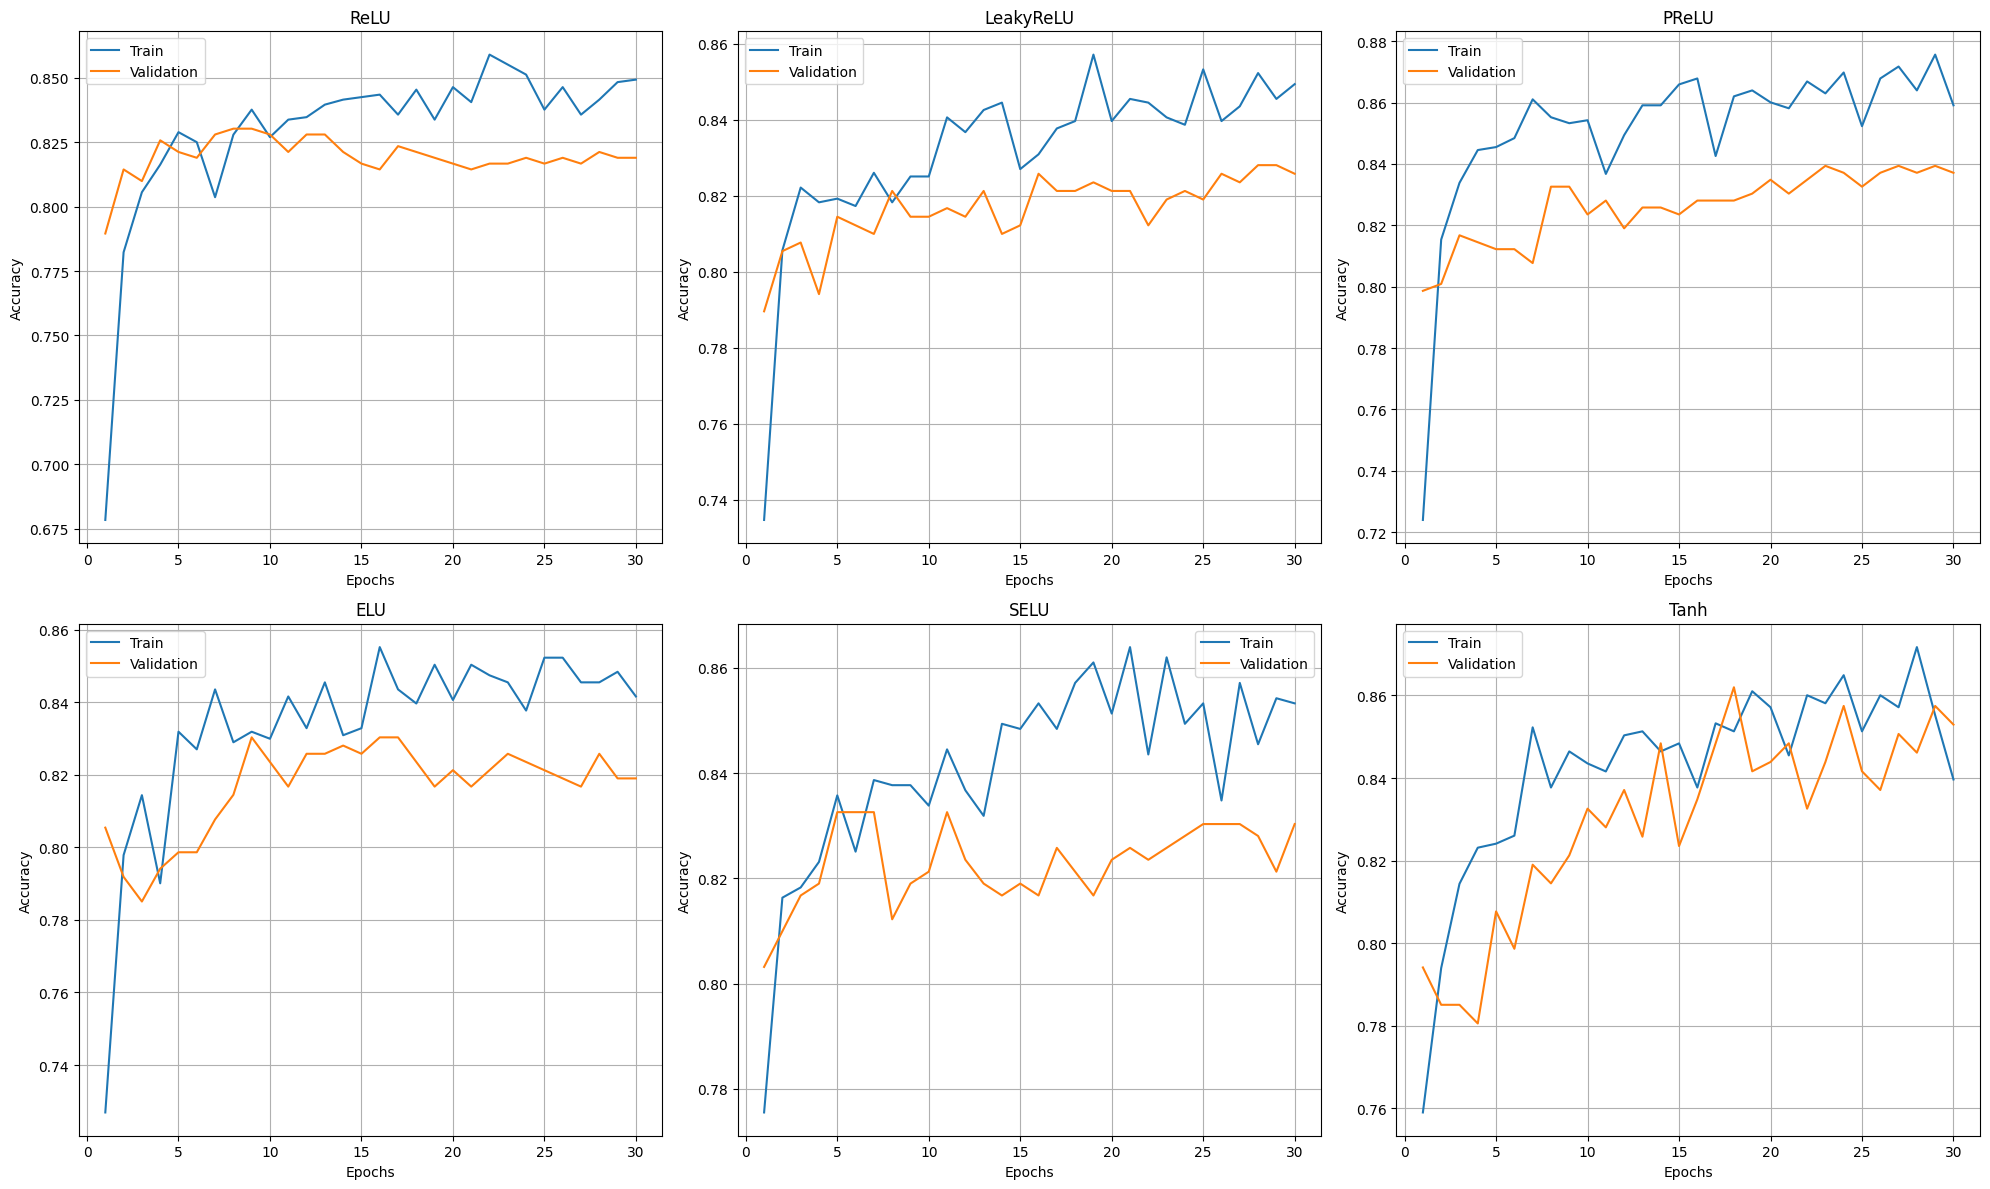

In [12]:
metric = 'accuracy'

fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model in enumerate(models):
    plot_stats(axes[i], model, metric)

plt.tight_layout()
plt.show()

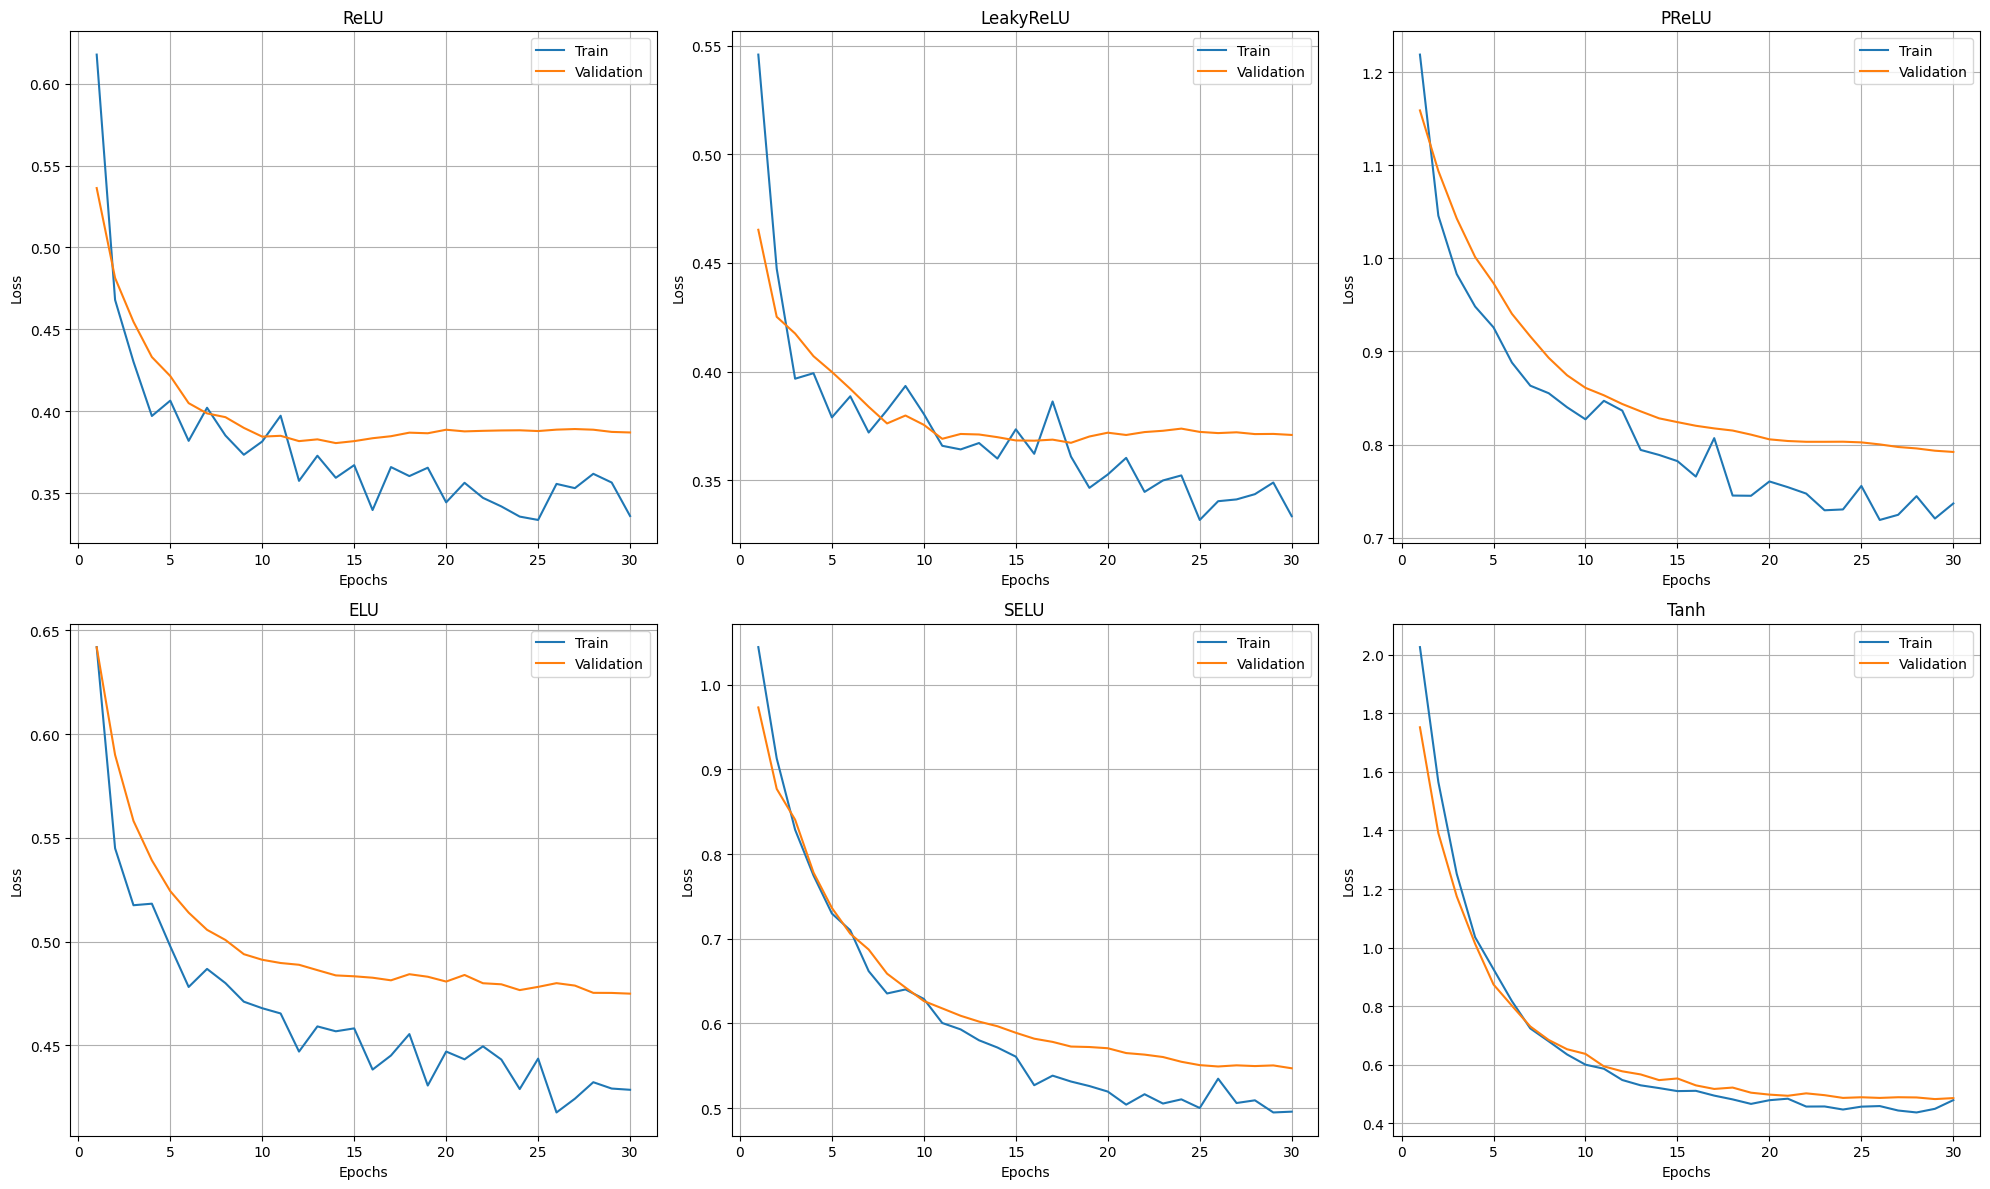

In [13]:
metric = 'loss'

fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model in enumerate(models):
    plot_stats(axes[i], model, metric)

plt.tight_layout()
plt.show()

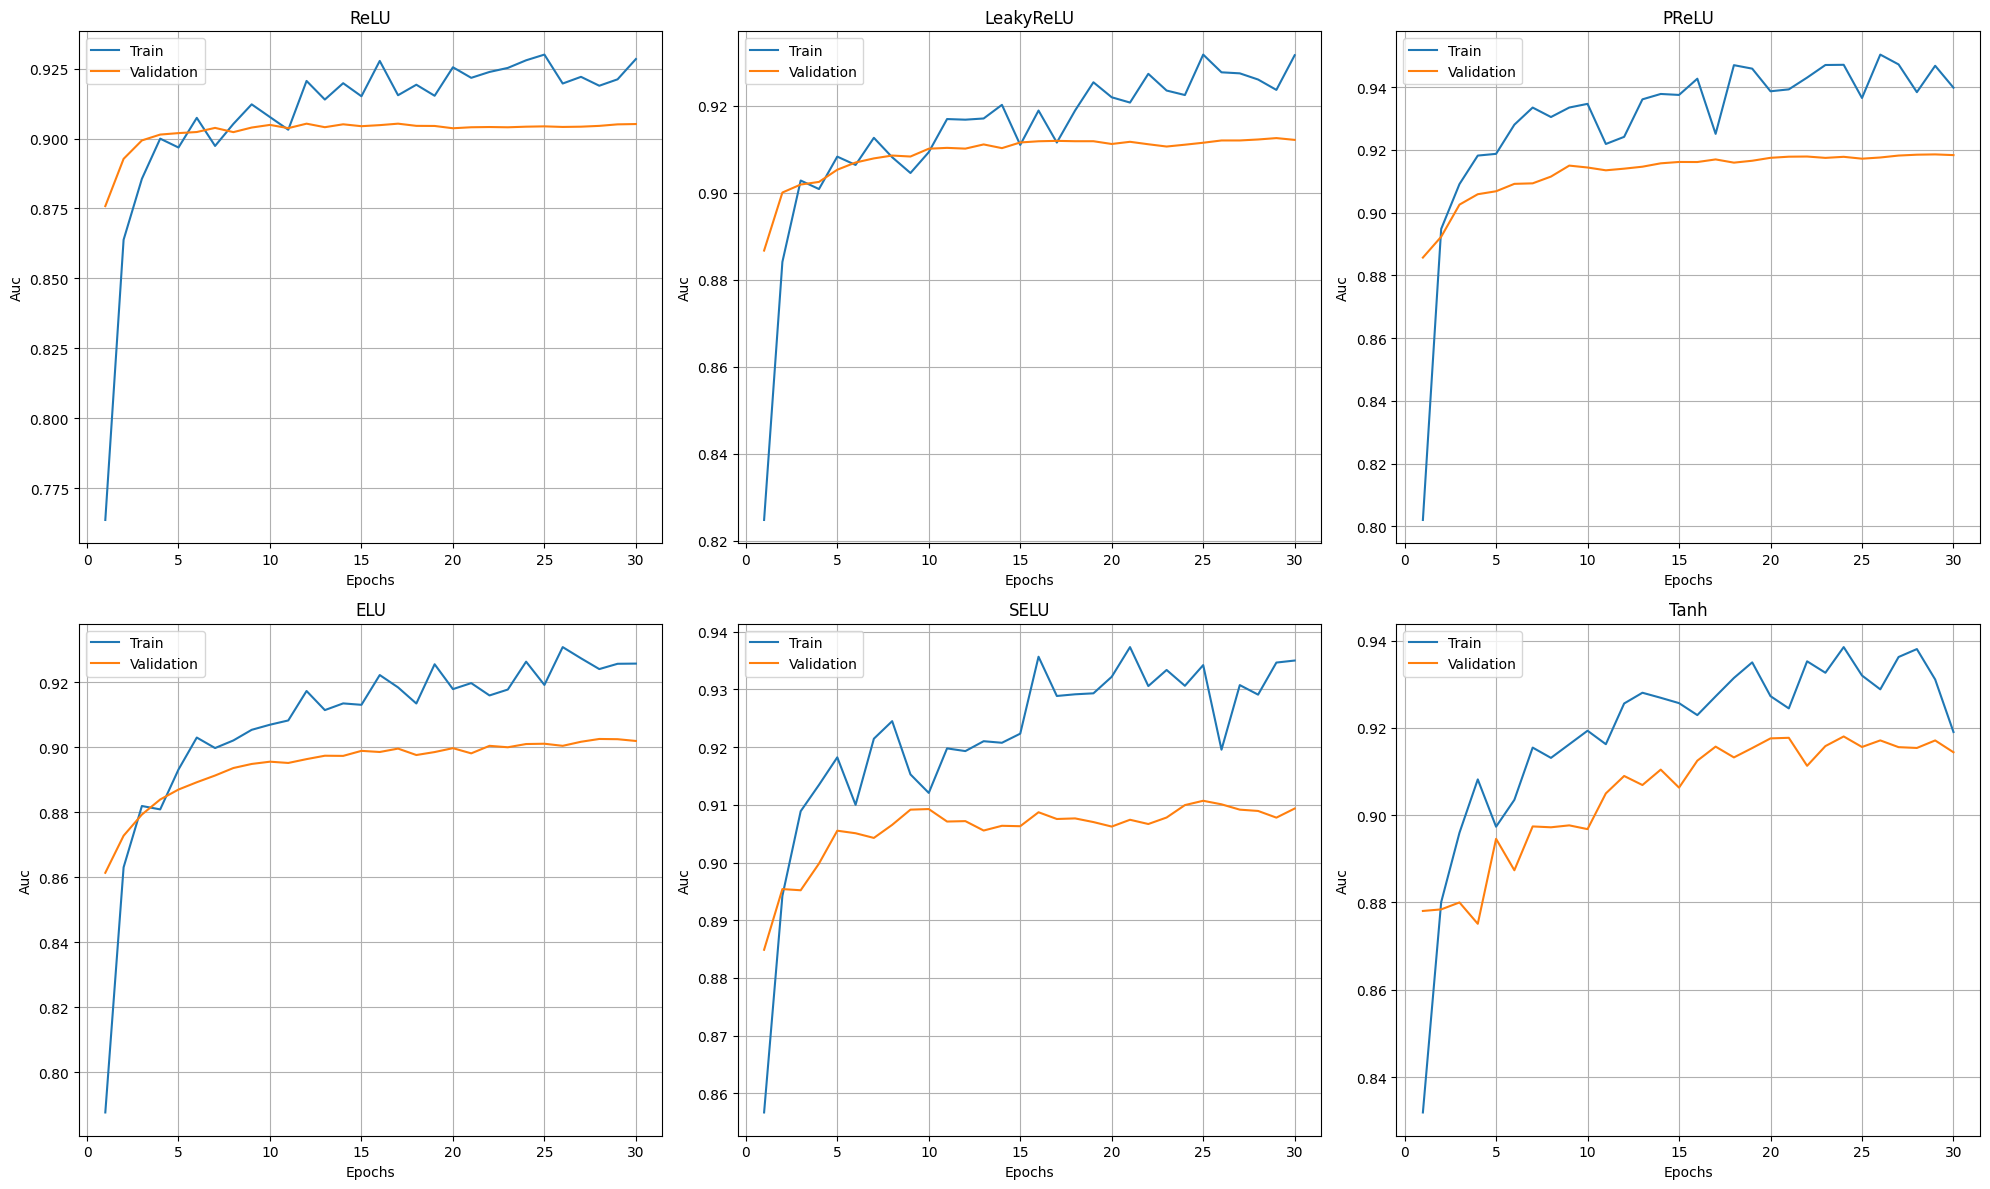

In [14]:
metric = 'auc'

fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model in enumerate(models):
    plot_stats(axes[i], model, metric)

plt.tight_layout()
plt.show()

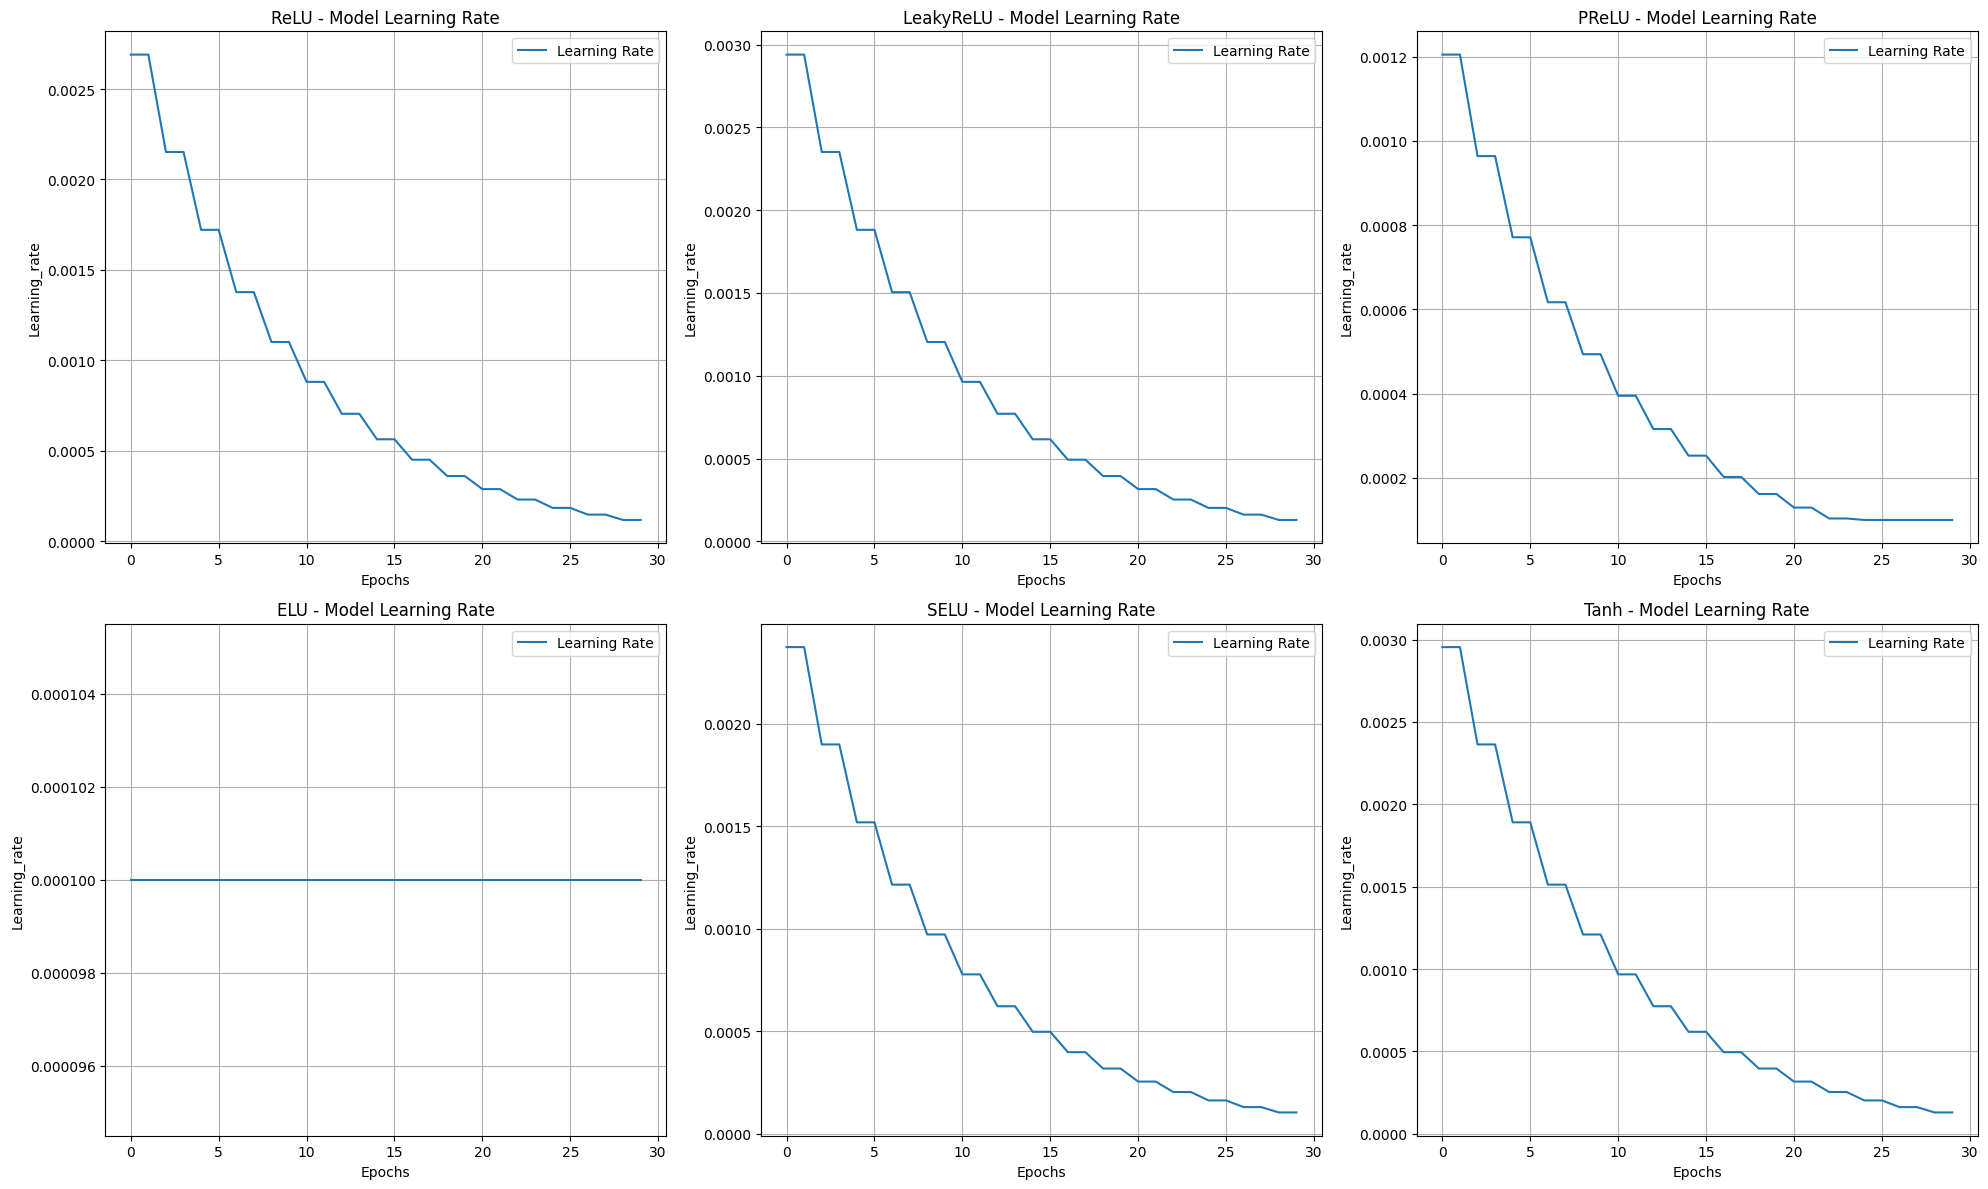

In [15]:
metric = 'learning_rate'

def plot_stats(ax, model):
    model_history = globals().get(f"{model}_history")
    train_metric = model_history.get('learning_rate')

    if train_metric is None:
        ax.set_title(f"{model}: '{metric}' not found")
        ax.axis('off')
        return

    ax.plot(train_metric, label='Learning Rate')
    ax.set_title(f'{model} - Model Learning Rate')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.capitalize())
    ax.legend()
    ax.grid(True)

fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model in enumerate(models):
    plot_stats(axes[i], model)

plt.tight_layout()
plt.show()

In [16]:
for model in models:
    logs = globals().get(f"{model}_logs")
    sel = logs.get('selected_features')
    selected_indices = list(sel)

    X_model = X_scaled[:, selected_indices]
    globals()[f"X_{model}"] = X_model
    print(f" - X_{model}: {'loaded' if f'X_{model}' in globals() else 'missing'}")

 - X_ReLU: loaded
 - X_LeakyReLU: loaded
 - X_PReLU: loaded
 - X_ELU: loaded
 - X_SELU: loaded
 - X_Tanh: loaded


In [17]:
from sklearn.metrics import accuracy_score

def model_accuracy(model_name):
    model = globals().get(f"{model_name}_model")
    X_data = globals().get(f"X_{model_name}")

    model_prob = model.predict(X_data)
    model_pred = (model_prob > 0.5).astype(int).flatten()

    acc = accuracy_score(y, model_pred)
    print(f"{model_name} Accuracy: {round(acc*100, 2)}%")

for model in models:
    model_accuracy(model)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ReLU Accuracy: 86.54%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
LeakyReLU Accuracy: 87.14%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
PReLU Accuracy: 88.33%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ELU Accuracy: 85.15%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
SELU Accuracy: 86.35%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tanh Accuracy: 87.84%


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(ax, model_name):
    model = globals().get(f"{model_name}_model")
    X_data = globals().get(f"X_{model_name}")

    model_prob = model.predict(X_data, verbose=0)
    model_pred = (model_prob > 0.5).astype(int).flatten()
    
    cm = confusion_matrix(y, model_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='magma', colorbar=False)
    ax.set_title(f"{model_name}")

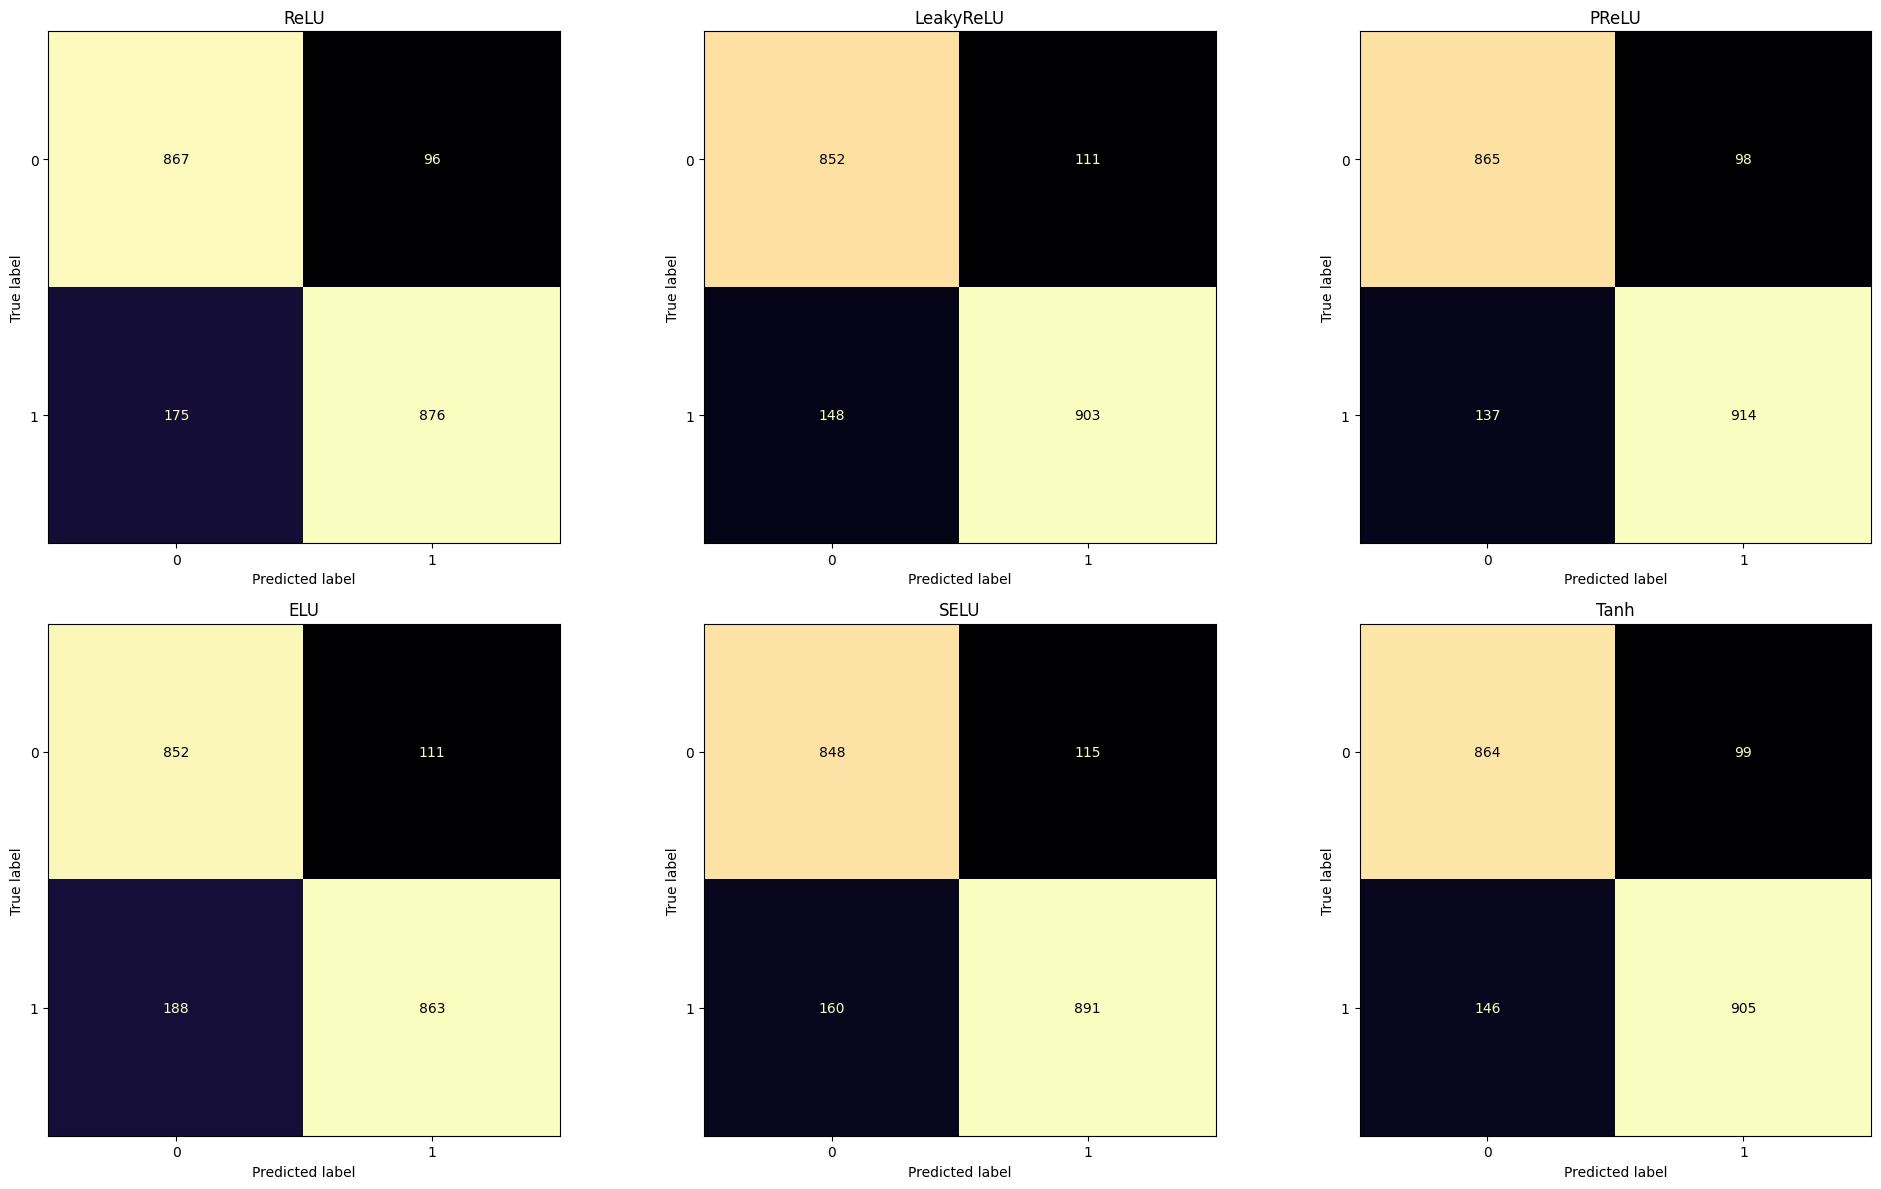

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model in enumerate(models):
    plot_confusion_matrix(axes[i], model)

plt.tight_layout()
plt.show()